In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
A = pd.read_excel(r'C:/Users/user/Downloads/finaldata1.xlsx')

In [3]:
A.head()

,year,fuelprice,gdpgrowth
0,2003,33.49,0.079
1,2004,35.71,0.078
2,2005,37.99,0.093
3,2006,43.50,0.093
4,2007,43.00,0.098


In [4]:
A.corr()

,year,fuelprice,gdpgrowth
year,1.000000,0.931099,-0.315103
fuelprice,0.931099,1.000000,-0.197875
gdpgrowth,-0.315103,-0.197875,1.000000


In [5]:
Y = A[["gdpgrowth"]]
X = A[["fuelprice"]]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 21)
print(xtrain)
print(ytrain)
print(xtest)
print(ytest)

    fuelprice
5       45.50
17      79.76
18     105.41
11      72.26
6       44.70
14      63.09
1       35.71
2       37.99
12      60.49
3       43.50
8       58.50
0       33.49
16      72.96
4       43.00
15      75.55
9       65.60
    gdpgrowth
5       0.039
17     -0.080
18      0.125
11      0.074
6       0.085
14      0.068
1       0.078
2       0.093
12      0.080
3       0.093
8       0.066
0       0.079
16      0.040
4       0.098
15      0.065
9       0.055
    fuelprice
7       48.00
10      66.09
19      96.72
13      59.68
    gdpgrowth
7       0.103
10      0.064
19      0.069
13      0.083


In [7]:
model.intercept_

NameError: name 'model' is not defined

In [8]:
model.coef_

NameError: name 'model' is not defined

In [9]:
q = int(input("Enter any value for fuel price : "))
p = -0.00045203*q + 0.09261143
print("Predicted_gdp: ",p)

Enter any value for fuel price : 


ValueError: invalid literal for int() with base 10: ''

In [10]:
pred = model.predict(xtest[["fuelprice"]])
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(ytest,pred)


NameError: name 'model' is not defined

In [11]:
mean_squared_error(ytest,pred)

NameError: name 'mean_squared_error' is not defined

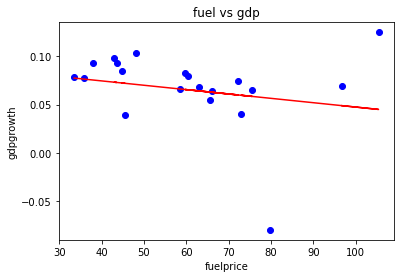

In [12]:
import matplotlib.pyplot as plt 
plt.scatter(A.fuelprice,A.gdpgrowth,c="blue")
plt.xlabel("fuelprice")
plt.ylabel("gdpgrowth")
plt.title("fuel vs gdp")
plt.plot(X,-0.00045203*X+0.09261143,c="red")



In [13]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdpgrowth   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.5817
Date:                Sat, 06 Aug 2022   Prob (F-statistic):              0.458
Time:                        22:35:45   Log-Likelihood:                 27.924
No. Observations:                  16   AIC:                            -51.85
Df Residuals:                      14   BIC:                            -50.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0926      0.037      2.536      0.024       0.014       0.171
fuelprice     -0.0005      0.001     -0.763      0.458      -0.002       0.001
==============================================================================
Omnibus:                       19.071   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.163
Skew:                          -1.692   Prob(JB):                     1.54e-05
Kurtosis:                       7.669   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
round(model.rsquared_adj,4)

-0.0287

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,pred_tr),2)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
ts_err = round(mean_absolute_error(ytest,pred_ts),2)
print(tr_err)
print(ts_err)

0.02
0.02
